# Principles of Data Science

### Lecture 22: Non-parametric Density Estimation

_MPhil in Data Intensive Science_

**University of Cambridge**

<h2 style="color: blue">Matt Kenzie</h2>

[mk652@cam.ac.uk](mailto:mk652@cam.ac.uk)

*The following lines **should** be included by default in all my lecture notebooks*

- Display matplotlib plots interactively

In [1]:
#%matplotlib widget

- Do not display the canvas title of the plot (default is "Figure N")

In [2]:
#%%html
#<style>
#div.jupyter-widgets.widget-label {display: none;}
#</style>

- Import standard modules

In [3]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('../mphil.mplstyle')

## Density Estimation (without parameterisation)

- Today's lecture covers Density Estimation in cases where we do not know or do not care what the explicit parameterisation of the denisty is

- Learning objectives:
    - Understand and be able to produce kernel density estimates (KDEs)
    - Realise the pitfalls and problems with KDEs
    - Be able to deploy "histogram pdfs"

## Recap

- We have covered several commonly found probability distributions
- In all cases we ensure the p.d.f (or p.m.f) is normalised and have a specific parameterisation of it

## What if we don't know the density?

- Sometimes we will know the parameterisation (or an approximation of it)
- We can often guess the parameteristaion and then fit the data to find the parameter estimates
- A lot of the time we also don't care
    - It is a small systematic effect
    - Inferred quantities do not depend strongly on the model choice
    
**Will cover two approaches**
- Use a histogram
- Use a kernel density estimation


## Histograms as densities

- This is a commonly used approach
- Approximate a density based on an independent "control" sample
    - Could come from adjoint dataset
    - Or from MC simulation
    
<br>

- In the case of a binned fit this provides a "template" 

- In the case of an unbinned fit it is an approximation
     - Any $X$ value in the bin will evaluate to the same probability
     
- Want a **large** independent sample to avoid / smooth statistical fluctuations


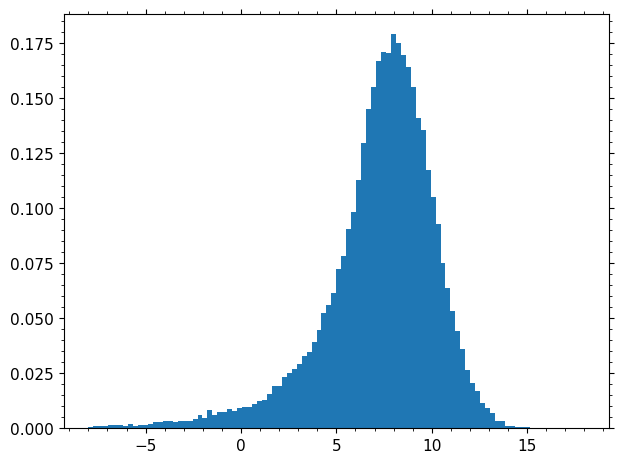

In [4]:
## generate from a slightly unusual shape
from scipy.stats import crystalball
cb = crystalball(beta=1, m=6, loc=8, scale=2)

dset = cb.rvs(size=50000)

# draw it
fig, ax = plt.subplots()
nh, xe, _ = ax.hist(dset, bins=100, range=(-8,18), density=True)

In [5]:
# create a pdf and or cdf

# first explicitly make a normalised histogram
xrange = (-8, 18)
nh, xe = np.histogram( dset, bins=100, range=xrange, density=True )

# and get the cumalative sums
bw = xe[1]-xe[0]
Fh = np.cumsum(nh)*bw

# the pdf (note use of np.digitize)
def shape_pdf(x):
    bin_inds = np.digitize(x, xe)-1
    bin_inds[ bin_inds >= len(nh) ] = len(nh)-1
    bin_inds[ bin_inds < 0 ] = 0
    return nh[bin_inds]

def shape_cdf(x):
    bin_inds = np.digitize(x, xe)-1
    bin_inds[ bin_inds >= len(nh) ] = len(nh)-1
    bin_inds[ bin_inds < 0 ] = 0
    return Fh[bin_inds]


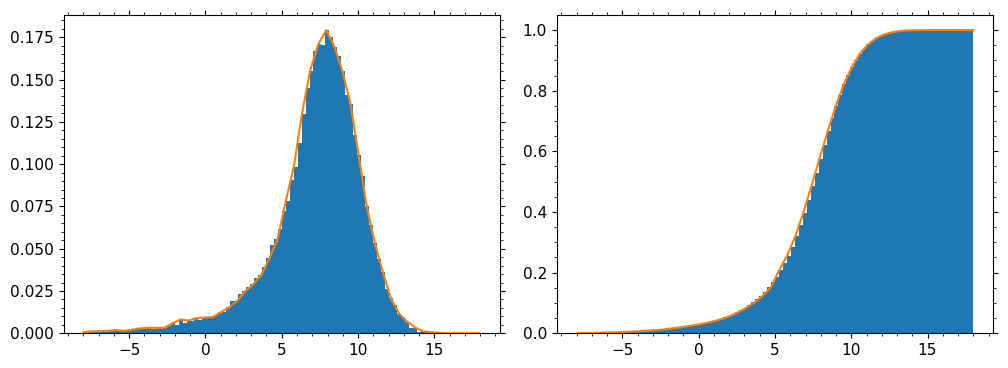

In [6]:
# and plot them to check
fig, ax = plt.subplots(1, 2, figsize=(12.8*0.8, 4.8*0.8))
x = np.linspace(*xrange,  )

ax[0].hist( dset, bins=100, range=xrange, density=True )
ax[0].plot( x, shape_pdf(x) )

ax[1].hist( dset, bins=100, range=xrange, density=True, cumulative=True )
ax[1].plot( x, shape_cdf(x) )


- notice I can evaluate at any value of $X$
- <font color="green">*Discussion in lecture about evaluation approximations*</font>
<br><br>

- This "histogram" p.d.f can be quite useful but it has several disadvantages
    - only an approximation
    - requires a large control sample
    - it is slow (requires look up of bin)
    - it has **no flexibility** (cannot float any shape parameters)

## Kernel Density Estimation

- An alternative which provides a smooth and continuous distribution
- Replaces the step function of the histogram with some smoothing *kernel*
- For dataset of the form
$$ X = \{X_1, X_2, \dots, X_N \} $$
with unknown density 

- Can approximate the shape with

$$ \hat{f}(X) = \frac{1}{N} \sum_i^N K \left( \frac{X-X_i}{h} \right) $$

- $K$ is the <font color="blue">kernel</font> and $h$ is a *tuneable* parameter called the <font color="blue">*bandwidth*</font>

- Note that $h$ is not **floatable** (more on that in a minute)

$$ \hat{f}(X) = \frac{1}{N} \sum_i^N K \left( \frac{X-X_i}{h} \right) $$

- The kernel $K$ can be any distribution we like 
- Total density approximated by a sum of Gaussians with the <font color="blue">same width</font> and different means (given by data point locations)



In [7]:
## An example of our own
from scipy.stats import norm

# random uniform dataset
np.random.seed(210187)
data = np.random.uniform(size=10) 

# model each point as a sum of Gaussians with width 0.1
def kde(x, data, h=0.1):
    res = np.zeros_like(x)
    for dpoint in data:
        res = res + norm.pdf(x, dpoint, h) / len(data)    
    return res


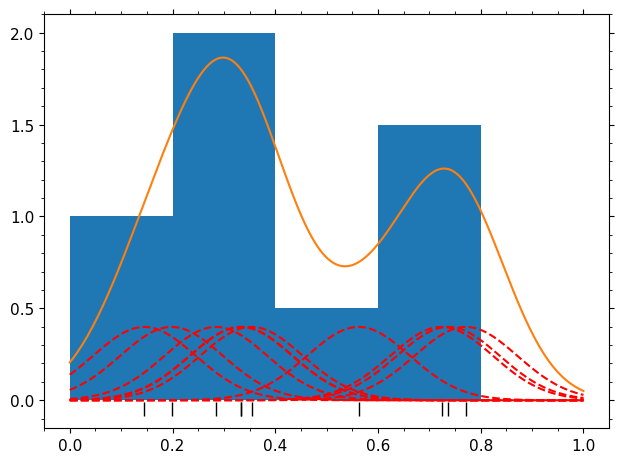

In [8]:
# make a plot of it
fig, ax = plt.subplots()

# histogram
ax.hist(data, bins=5, range=(0,1), density=True)

# rug of points
ax.plot(data, np.full_like(data,-0.05), 'k|', ms=10, lw=2)

# the kde
x = np.linspace(0, 1, 200)
ax.plot(x, kde(x, data))

# the individual kernels
N = len(data)
for dpoint in data:
    ax.plot(x, norm.pdf(x, dpoint, 0.1)/N, 'r--')

## Try it on our previous sample

- How do we get on with the Crystal Ball shape

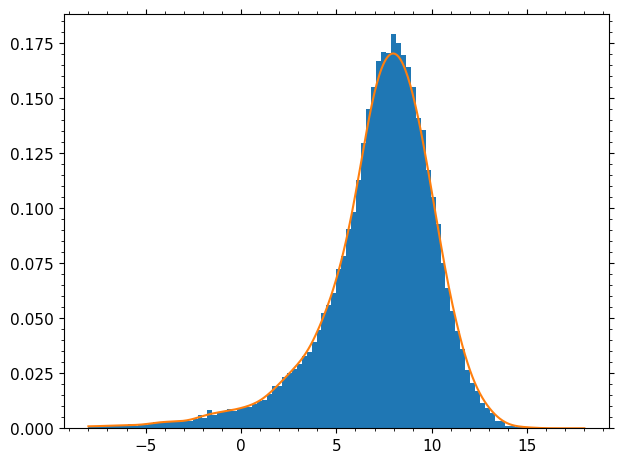

In [9]:
x = np.linspace(-8, 18, 400)
y = kde(x, dset, h=0.5)
fig, ax = plt.subplots()
ax.hist(dset, bins=100, range=(-8,18), density=True)
ax.plot(x, y)

- Pretty good right?
- Any concerns here?
- <font color="green">*Discussion in lecture*</font>

# <font color="darkred">*Musical interlude...*</font>

## It's Feedback time!!!


- <font color="blue">Please, please, **please**</font>. I beg you. Take 5 mins out of your schedule to **help** me.
- I cannot improve without your feedback
- I need feedback from **everyone** 
    - not just those who are in the extremes of love or hatred
    - feedback is just as important even if you think the course is just ok

- For those in the lecture. Please spend 5 mins doing it **NOW**
- For those not in the lecture. Please do it **NOW** wherever you are


https://cambridge.eu.qualtrics.com/jfe/form/SV_8ifb4RpJZvrCjno

<img src="plots/S1_PDS_QR_code.png" width="600">

## So what about this bandwidth parameter?

- What difference does it make?
- How do I chose it?


## What difference does the bandwidth make?

In [10]:
x = np.linspace(-8, 18, 400)
yt = crystalball.pdf(x,beta=1, m=6, loc=8, scale=2)

y1 = kde(x, dset, h=0.1)
y2 = kde(x, dset, h=0.2)
y3 = kde(x, dset, h=1)


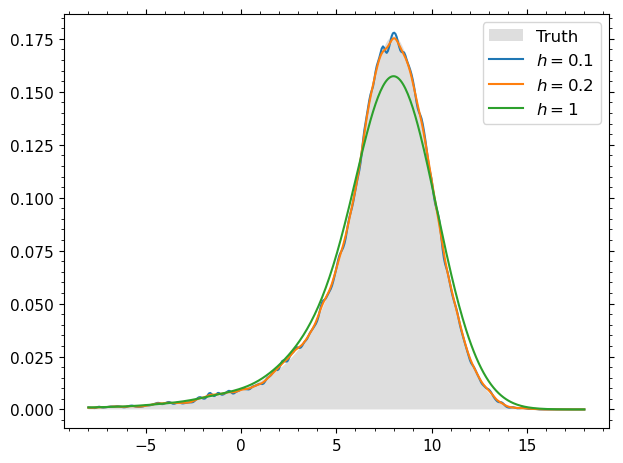

In [11]:
fig, ax = plt.subplots()
ax.fill_between(x, 0, yt, fc='0.75', alpha=0.5, label='Truth')
ax.plot(x, y1, label='$h=0.1$')
ax.plot(x, y2, label='$h=0.2$')
ax.plot(x, y3, label='$h=1$')
ax.legend()


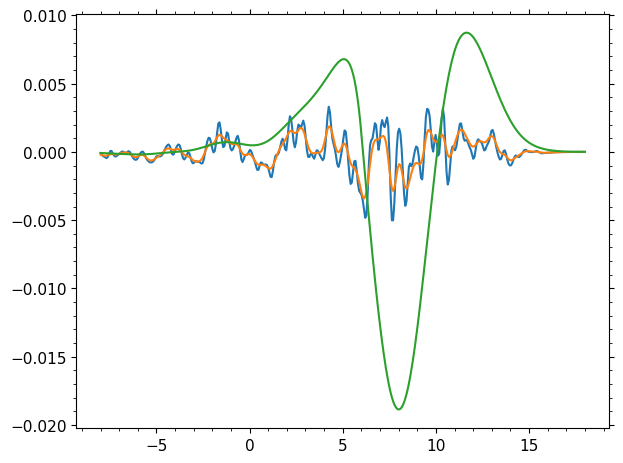

In [12]:
fig, ax = plt.subplots()
ax.plot( x, y1-yt )
ax.plot( x, y2-yt )
ax.plot( x, y3-yt )

- So the bandwidth makes quite a lot of difference

**Larger bandwidth**
- Smoother distribution
- Consquence is more bias

**Smaller bandwidth**
- More "wobbly" / fluctuating distribution
- Consquence is larger variance

## How to chose the bandwidth parameter

- It can (and often is) done by "eye"
- Of course this becomes very hard for multi-dimensions
- Common use of <font color="blue">Scott's</font> and <font color="blue">Silverman's</font> algorithms
    - <font color="green">*Dicussion of these in lectures*</font>
    - I do not cover them in detail so read more if interested (used for binning and KDE width)

In [13]:
from sklearn.neighbors import KernelDensity
kde_scott = KernelDensity(bandwidth='scott', kernel='gaussian').fit( dset.reshape(-1,1) )
kde_silve = KernelDensity(bandwidth='silverman', kernel='gaussian').fit( dset.reshape(-1,1) )

print( kde_scott.bandwidth_ )
print( kde_silve.bandwidth_ )


0.11486983549970349
0.12167286837864114


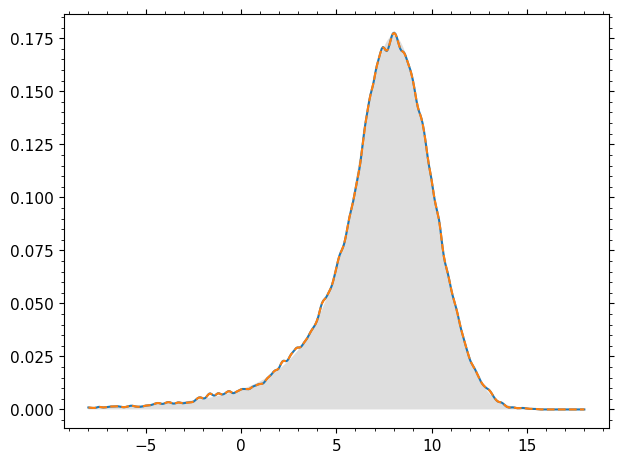

In [14]:
x = np.linspace(-8, 18, 400)
yt = crystalball.pdf(x,beta=1, m=6, loc=8, scale=2)
y_scott = np.exp( kde_scott.score_samples( x.reshape(-1,1) ) )
y_silve = np.exp( kde_silve.score_samples( x.reshape(-1,1) ) )

fig, ax = plt.subplots()
ax.fill_between(x, 0, yt, fc='0.75', alpha=0.5, label='Truth')
ax.plot(x, y_scott, label='Scott')
ax.plot(x, y_silve, ls='--', label='Silverman')

## Why is the bandwidth not a fit parameter?

- <font color="green">*Some discussion of this in the lecture*</font>

- Should be obvious that the "best fit" (from a likelihood or $\chi^2$ perspective) will minimise the bandwidth parameter itself.

## What difference does the kernel shape make?

- It is usually not *that* important 
- Bandwidth is by far more so
- Let's see a few examples

<img src="plots/kernels.png" alt="drawing" width="800">

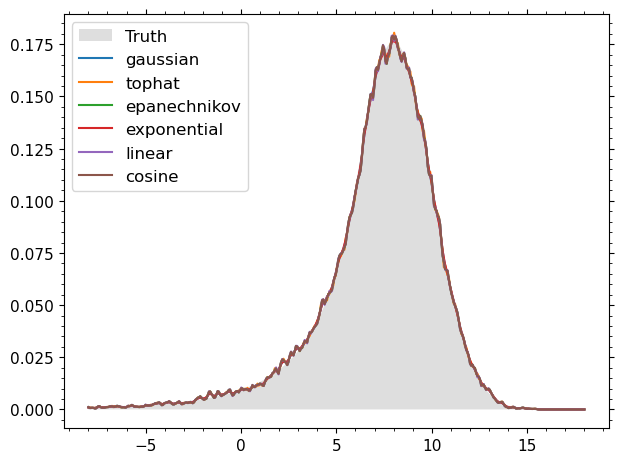

In [15]:
fig, ax = plt.subplots()
ax.fill_between(x, 0, yt, fc='0.75', alpha=0.5, label='Truth')

yvs = {}
for kernel in ['gaussian', 'tophat', 'epanechnikov', 'exponential', 'linear', 'cosine']:
    kde = KernelDensity( bandwidth='scott', kernel=kernel ).fit( dset.reshape(-1,1) )
    yvs[kernel] = np.exp( kde.score_samples( x.reshape(-1,1) ) )
    ax.plot(x, yvs[kernel], label=kernel)

ax.legend()

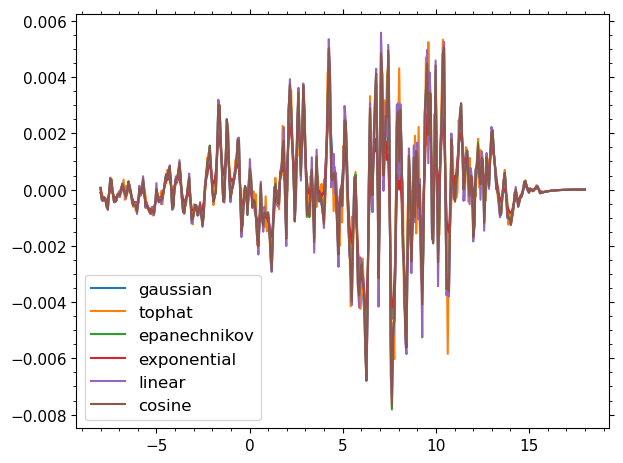

In [16]:
fig, ax = plt.subplots()

for kernel, yv in yvs.items():
    ax.plot( x, yv - yt, label=kernel )

ax.legend() 

## Discussion of KDEs at boundaries

- They want to fall away at the edges?
- Can we deal with this?
- <font color="green">*Discussion in the lectures*</font>


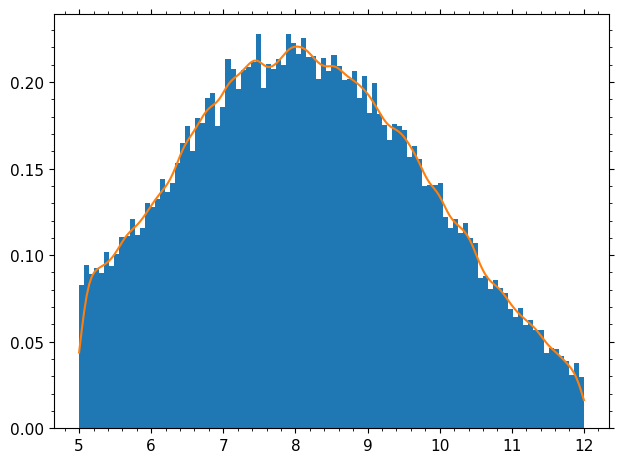

In [17]:
# clip the dataset
newrange = (5,12)
dset = dset[ (dset>newrange[0]) & (dset<newrange[1]) ]

kde = KernelDensity(bandwidth=0.1).fit( dset.reshape(-1,1) )

fig, ax = plt.subplots()
ax.hist( dset, bins=100, range=newrange, density=True )
x = np.linspace(*newrange, 200)
ax.plot( x, np.exp( kde.score_samples( x.reshape(-1,1) ) ) )


## What other applications

- Extension to multi-dimensions quite straightforward
- We already saw them way back in Lecture 1
- Visualisation of datasets with no *a priori* knowledge

In [18]:
from sklearn.datasets import make_classification

X = make_classification(n_samples=25000, n_features=4, n_informative=4, n_redundant=0, n_classes=3)


In [19]:
import pandas as pd
df = pd.DataFrame(X[0], columns=['Feature A','Feature B','Feature C','Feature D'])
df['Class'] = [ f'Class {x}' for x in X[1] ]
display(df)

,Feature A,Feature B,Feature C,Feature D,Class
0,-0.585770,-1.080272,1.711084,2.053101,Class 0
1,-1.234338,-0.575120,0.992057,2.216220,Class 0
2,-0.608253,-1.215779,0.684359,0.795161,Class 0
3,-2.150518,1.157301,-0.214871,-1.514251,Class 2
4,-1.951271,-0.741502,0.114081,0.604595,Class 0
...,...,...,...,...,...
24995,-0.219254,0.821900,1.480169,-0.097034,Class 1
24996,0.505745,0.400664,-1.362013,0.750020,Class 2
24997,-0.814417,1.272123,1.216780,1.064966,Class 1
24998,-1.763200,0.173491,-0.883390,-1.541983,Class 2


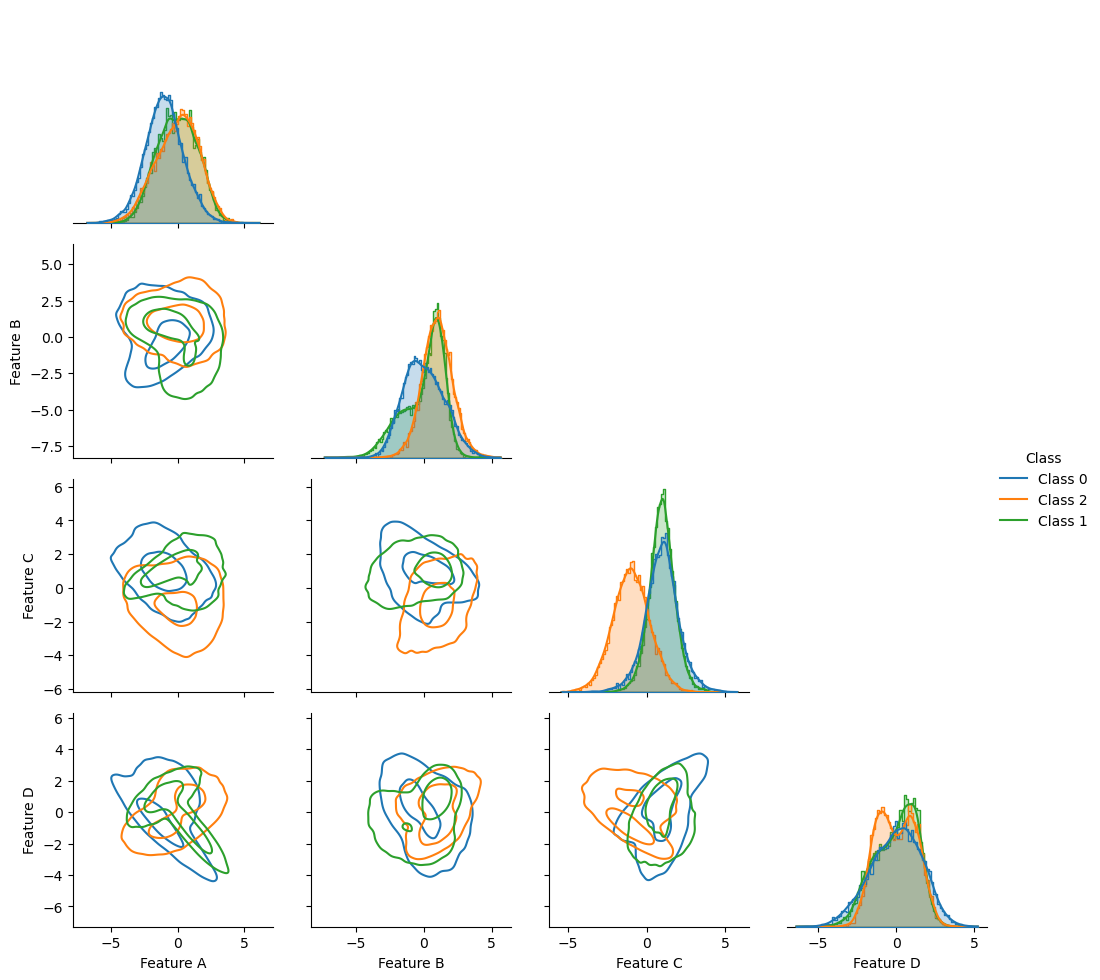

In [20]:
plt.style.use('default')
import seaborn as sns
g = sns.PairGrid(df, corner=True, hue='Class')
g.map_upper(sns.scatterplot, s=3, alpha=0.6)
g.map_lower(sns.kdeplot, levels=3)
g.map_diag(sns.histplot, kde=True, element='step')
g.add_legend()

# End of Lecture 22

By the end of this lecture you should:
  - Understand and be able to produce kernel density estimates (KDEs)
  - Realise the pitfalls and problems with KDEs
  - Be able to deploy "histogram pdfs